In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn
from torchvision import transforms, datasets
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
# 한글 폰트 저장
# 글꼴 파일 다운로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from matplotlib import rc
import matplotlib.pyplot as plt

# 한글 글꼴 설정
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 8, 'font.family': 'NanumGothic'})

In [ ]:
model = models.resnet34(pretrained=False)

In [ ]:
# 학습 모델 prediction 결과 시각화

In [ ]:
state_dict = torch.load('/content/drive/MyDrive/best_model34_128_last.pth')
model.fc = nn.Linear(model.fc.in_features, 42)

model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
path = "/content/drive/MyDrive/kfood_train/train/"
class_names = os.listdir(path)
print(len(class_names))

42


In [ ]:
data_root_train='/content/drive/MyDrive/kfood_train/train'
data_root_val='/content/drive/MyDrive/kfood_val/val'

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
import torch.utils as utils
from torch.utils.data import DataLoader

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data_val= datasets.ImageFolder(root=data_root_val, transform=transform)
test_loader = DataLoader(data_val, batch_size=1, shuffle=False)

In [ ]:
test_loader

In [ ]:
batch_size = 128

In [ ]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
predictions = [] # 예측 라벨 결과

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to('cuda')
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

In [ ]:
len(predictions)

4223

In [ ]:
true_labels = [data_val[i][1] for i in range(len(data_val))] # 실제 라벨값

In [ ]:
# 틀린 이미지 list 생성

false_img = [i != j for i, j in zip(predictions, true_labels)]

false_img_index = []
for idx, i in enumerate(false_img) :
  if i == True :
    false_img_index.append(idx)

In [ ]:
# 맞춘 이미지 list 생성

true_img = [i == j for i, j in zip(predictions, true_labels)]

true_img_index = []
for idx, i in enumerate(true_img) :
  if i == True :
    true_img_index.append(idx)

In [ ]:
class_lists = {classname : [] for classname in data_val.classes}

In [ ]:
for num in false_img_index :
  class_lists[data_val.classes[data_val[num][1]]].append(num)

In [ ]:
# 정확도 하위 12개 클래스 틀린 샘플 시각화

low_class = ['동그랑땡', '갈비구이', '김치볶음밥', '조기구이', '갈치구이', '떡국_만두국', '황태구이', '장어구이', '비빔밥', '떡갈비', '파전', '계란말이']

In [ ]:
from PIL import Image

for name in low_class :
  fig, axes = plt.subplots((len(class_lists[name])//4)+1, 4, figsize=(32, 21))
  plt.subplots_adjust(wspace=0.2, hspace=0.6)

  for i, adress in enumerate(class_lists[name]):
      row, col = divmod(i, 4)
      img = data_val[adress][0]
      img = img / img.max()
      print(img.shape)
      axes[row, col].imshow(img.permute(1, 2, 0))
      axes[row, col].axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 맞춘 샘플도 시각화

true_class_lists = {classname : [] for classname in data_val.classes}

In [ ]:
for num in true_img_index :
  true_class_lists[data_val.classes[data_val[num][1]]].append(num)

In [ ]:
for name in low_class :
  fig, axes = plt.subplots((len(true_class_lists[name])//4)+1, 4, figsize=(32, 21))
  plt.subplots_adjust(wspace=0.2, hspace=0.6)

  for i, adress in enumerate(true_class_lists[name]):
      row, col = divmod(i, 4)
      img = data_val[adress][0]
      img = img / img.max()
      axes[row, col].imshow(img.permute(1, 2, 0))
      axes[row, col].axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 하위 정확도 class의 예측 빈도 plot

In [ ]:
data_val.classes.index(low_class[1])

0

In [ ]:
class_lists_wrong = {classname : [] for classname in data_val.classes}

for i, classes in enumerate(predictions) :
  class_lists_wrong[data_val.classes[data_val[i][1]]].append(classes)

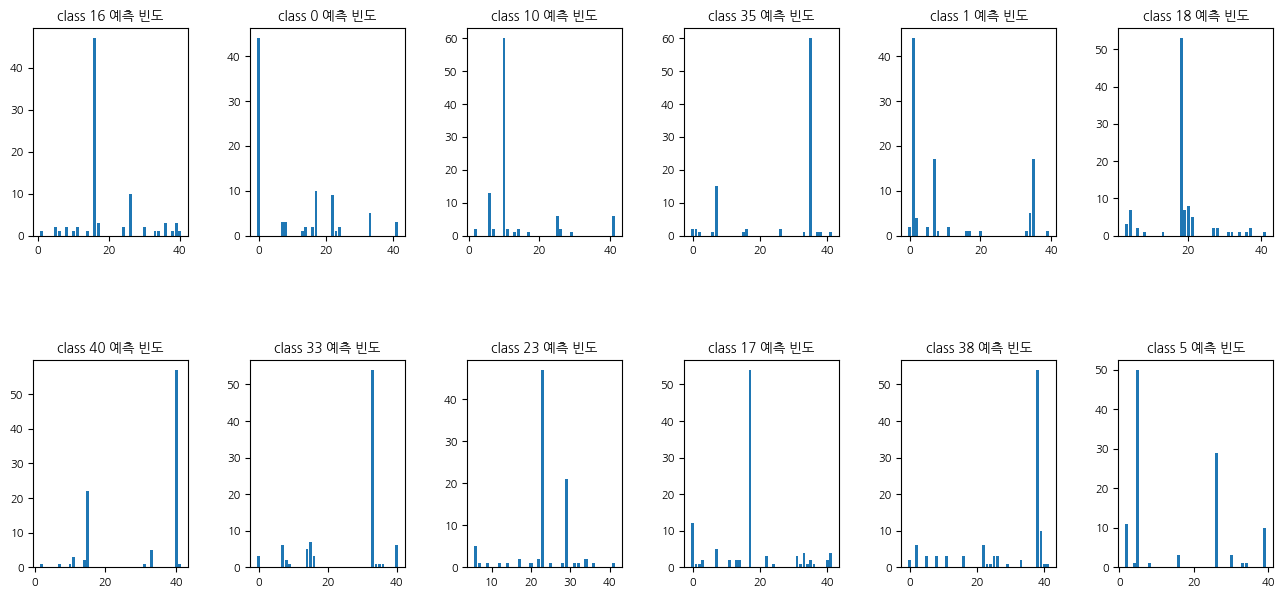

In [ ]:
from collections import Counter

# subplot 생성
fig, axes = plt.subplots(2, 6, figsize=(16, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i in range(len(low_class)) :
  row, col = divmod(i, 6)

  # 빈도 plot 생성
  frequency_counter = Counter(class_lists_wrong[low_class[i]])
  sorted_items = sorted(frequency_counter.items())

  axes[row, col].bar(*zip(*sorted_items))
  axes[row, col].set_title(f"class {data_val.classes.index(low_class[i])} 예측 빈도")

In [ ]:
# 하위 12개 class에서 2번째로 많이 예측한 클래스 / 시각화

for i in range(len(low_class)) :
  frequency_counter = Counter(class_lists_wrong[low_class[i]])

  sorted_items = sorted(frequency_counter.items(), key=lambda x: x[1], reverse = True)
  second_largest_key = sorted_items[1][0]

  print(low_class[i], second_largest_key)

동그랑땡 26
갈비구이 17
김치볶음밥 6
조기구이 7
갈치구이 35
떡국_만두국 20
황태구이 15
장어구이 15
비빔밥 29
떡갈비 0
파전 39
계란말이 26


In [ ]:
class_lists_second = {classname : [] for classname in low_class}

In [ ]:
print('오인 class (원 class : False)')
for num in range(len(low_class)) :
  # 각 low_class별로 두번째로 많이 예측한 class (= 가장 많이 오인한 class) => ex) 동그랑땡을 26번, 생선전으로 오해한 사진
  frequency_counter = Counter(class_lists_wrong[low_class[num]])

  sorted_items = sorted(frequency_counter.items(), key=lambda x: x[1], reverse = True)
  second_largest_key = sorted_items[1][0]

  print(low_class[num], ':' ,data_val.classes[second_largest_key])

  # 오인한 class의 img 분석
  for i in class_lists[low_class[num]] :
    if predictions[i] == second_largest_key :
      class_lists_second[low_class[num]].append(i)

오인 class (원 class : False)
동그랑땡 : 생선전
갈비구이 : 떡갈비
김치볶음밥 : 계란후라이
조기구이 : 고등어구이
갈치구이 : 조기구이
떡국_만두국 : 미역국
황태구이 : 더덕구이
장어구이 : 더덕구이
비빔밥 : 알밥
떡갈비 : 갈비구이
파전 : 호박전
계란말이 : 생선전


In [ ]:
# 시각화
for name in low_class :
  fig, axes = plt.subplots((len(class_lists_second[name])//4)+1, 4, figsize=(32, 21))
  plt.subplots_adjust(wspace=0.2, hspace=0.6)

  for i, adress in enumerate(class_lists_second[name]):
      row, col = divmod(i, 4)
      img = data_val[adress][0]
      img = img / img.max()
      axes[row, col].imshow(img.permute(1, 2, 0))
      axes[row, col].axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# augmentation 판단 완료 / 학습 진행

In [ ]:
transform_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.5),
    transforms.RandomRotation(degrees=(0, 180)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomVerticalFlip(p=0.05),
    transforms.RandomGrayscale(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# 데이터 불러오기
data_train = datasets.ImageFolder(root=data_root_train, transform=transform_aug)
data_val= datasets.ImageFolder(root=data_root_val, transform=transform)

In [ ]:
# 데이터 로더 설정
batch_size = 128
train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(data_val, batch_size=batch_size)

In [ ]:
# 필요한 라이브러리 불러오기
from tqdm.notebook import tqdm
from torch import nn, optim
from torch.autograd import Variable
from torchvision import models
from torch.backends import cudnn
cudnn.benchmark = True

In [ ]:
# DCC 측에서 제공받은 코드(변형X)
@torch.no_grad()
def validate_epoch(model: nn.Module, data_loader: DataLoader, device: torch.device):
    ''' data_loader provides inputs and GTs.
        model receives input images from data_loader and produces logits.
        returns the accuracy of model in percent.
    '''
    model.eval()
    accuracies = []
    for images, labels in tqdm(data_loader, total=len(data_loader), mininterval=1, desc='measuring accuracy'):
        images = images.to(device)
        labels = labels.to(device)

        logits = model(images)
        pred = torch.argmax(logits, dim=1)

        accuracies.append(pred == labels)

    accuracy = torch.concat(accuracies).float().mean() * 100
    return accuracy.item()

In [ ]:
# 모델 구축(ResNet18)
ResNet34 = models.resnet34(pretrained=False)

fc_in_features = ResNet34.fc.in_features
ResNet34.fc = nn.Linear(fc_in_features, len(class_names))
ResNet34 = ResNet34.to(device)

In [ ]:
# hyperparameters 설정
batch = 128
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ResNet34.parameters(), lr=0.001)

In [ ]:
num_epochs = 50
best_val_accuracy = 0  # 초기 최고 검증 정확도
best_model = None

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)  # 모델과 데이터를 동일한 장치로 이동
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()


        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()



    train_accuracy = 100 * correct_train / total_train

    # 검증 데이터셋에 대한 정확도 측정
    val_accuracy = validate_epoch(model, val_loader, device)

    # 각 에포크가 끝날 때 훈련 및 검증 정확도를 출력n

    print(f'Epoch : [{epoch}]/[{num_epochs}]')
    print(f'Training Accuracy: {train_accuracy:.2f}%')
    print(f'Validation Accuracy: {val_accuracy:.2f}%')

   # 현재 검증 정확도가 최고 정확도보다 높으면 모델 저장
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        # 모델의 state_dict를 저장
        best_model = model
        torch.save(best_model.state_dict(), 'best_model34_128_AUG.pth')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.08it/s]


Epoch : [0]/[50]
Training Accuracy: 9.34%
Validation Accuracy: 11.24%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.08it/s]


Epoch : [1]/[50]
Training Accuracy: 16.08%
Validation Accuracy: 19.99%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.07it/s]


Epoch : [2]/[50]
Training Accuracy: 21.58%
Validation Accuracy: 21.34%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]


Epoch : [3]/[50]
Training Accuracy: 26.91%
Validation Accuracy: 26.97%


measuring accuracy: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]


Epoch : [4]/[50]
Training Accuracy: 31.94%
Validation Accuracy: 30.42%


measuring accuracy: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]


Epoch : [5]/[50]
Training Accuracy: 36.50%
Validation Accuracy: 37.23%


measuring accuracy: 100%|██████████| 33/33 [00:33<00:00,  1.00s/it]


Epoch : [6]/[50]
Training Accuracy: 39.85%
Validation Accuracy: 40.71%


measuring accuracy: 100%|██████████| 33/33 [00:33<00:00,  1.02s/it]


Epoch : [7]/[50]
Training Accuracy: 42.85%
Validation Accuracy: 42.23%


measuring accuracy: 100%|██████████| 33/33 [00:32<00:00,  1.01it/s]


Epoch : [8]/[50]
Training Accuracy: 45.52%
Validation Accuracy: 46.95%


measuring accuracy: 100%|██████████| 33/33 [00:33<00:00,  1.02s/it]


Epoch : [9]/[50]
Training Accuracy: 48.45%
Validation Accuracy: 46.67%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.08it/s]


Epoch : [10]/[50]
Training Accuracy: 50.20%
Validation Accuracy: 48.83%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]


Epoch : [11]/[50]
Training Accuracy: 52.54%
Validation Accuracy: 50.24%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]


Epoch : [12]/[50]
Training Accuracy: 54.56%
Validation Accuracy: 56.38%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]


Epoch : [13]/[50]
Training Accuracy: 55.68%
Validation Accuracy: 56.29%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]


Epoch : [14]/[50]
Training Accuracy: 57.49%
Validation Accuracy: 56.62%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.07it/s]


Epoch : [15]/[50]
Training Accuracy: 58.93%
Validation Accuracy: 53.48%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.08it/s]


Epoch : [16]/[50]
Training Accuracy: 59.86%
Validation Accuracy: 54.43%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.10it/s]


Epoch : [17]/[50]
Training Accuracy: 61.51%
Validation Accuracy: 58.22%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Epoch : [18]/[50]
Training Accuracy: 62.75%
Validation Accuracy: 56.48%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Epoch : [19]/[50]
Training Accuracy: 63.28%
Validation Accuracy: 58.86%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.08it/s]


Epoch : [20]/[50]
Training Accuracy: 64.95%
Validation Accuracy: 63.20%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]


Epoch : [21]/[50]
Training Accuracy: 65.95%
Validation Accuracy: 62.77%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]


Epoch : [22]/[50]
Training Accuracy: 66.90%
Validation Accuracy: 65.44%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Epoch : [23]/[50]
Training Accuracy: 67.57%
Validation Accuracy: 64.53%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.08it/s]


Epoch : [24]/[50]
Training Accuracy: 68.57%
Validation Accuracy: 64.67%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]


Epoch : [25]/[50]
Training Accuracy: 69.68%
Validation Accuracy: 61.43%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Epoch : [26]/[50]
Training Accuracy: 70.87%
Validation Accuracy: 61.72%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Epoch : [27]/[50]
Training Accuracy: 71.76%
Validation Accuracy: 67.75%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Epoch : [28]/[50]
Training Accuracy: 72.62%
Validation Accuracy: 68.32%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Epoch : [29]/[50]
Training Accuracy: 73.22%
Validation Accuracy: 67.08%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Epoch : [30]/[50]
Training Accuracy: 74.30%
Validation Accuracy: 66.01%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]


Epoch : [31]/[50]
Training Accuracy: 75.36%
Validation Accuracy: 68.01%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]


Epoch : [32]/[50]
Training Accuracy: 76.06%
Validation Accuracy: 68.70%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]


Epoch : [33]/[50]
Training Accuracy: 76.81%
Validation Accuracy: 70.25%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.08it/s]


Epoch : [34]/[50]
Training Accuracy: 77.33%
Validation Accuracy: 67.22%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Epoch : [35]/[50]
Training Accuracy: 78.73%
Validation Accuracy: 68.34%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]


Epoch : [36]/[50]
Training Accuracy: 79.20%
Validation Accuracy: 70.41%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]


Epoch : [37]/[50]
Training Accuracy: 79.67%
Validation Accuracy: 68.70%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.08it/s]


Epoch : [38]/[50]
Training Accuracy: 80.82%
Validation Accuracy: 70.94%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]


Epoch : [39]/[50]
Training Accuracy: 81.11%
Validation Accuracy: 64.17%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]


Epoch : [40]/[50]
Training Accuracy: 82.04%
Validation Accuracy: 69.34%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.08it/s]


Epoch : [41]/[50]
Training Accuracy: 83.13%
Validation Accuracy: 70.39%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.08it/s]


Epoch : [42]/[50]
Training Accuracy: 83.53%
Validation Accuracy: 70.91%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]


Epoch : [43]/[50]
Training Accuracy: 84.30%
Validation Accuracy: 70.20%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]


Epoch : [44]/[50]
Training Accuracy: 84.48%
Validation Accuracy: 71.32%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]


Epoch : [45]/[50]
Training Accuracy: 85.54%
Validation Accuracy: 70.91%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.10it/s]


Epoch : [46]/[50]
Training Accuracy: 85.50%
Validation Accuracy: 71.08%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.10it/s]


Epoch : [47]/[50]
Training Accuracy: 86.91%
Validation Accuracy: 71.13%


measuring accuracy: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Epoch : [48]/[50]
Training Accuracy: 87.04%
Validation Accuracy: 70.37%


measuring accuracy: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]


Epoch : [49]/[50]
Training Accuracy: 87.54%
Validation Accuracy: 72.22%


In [ ]:
# 모델 불러오기
state_dict = torch.load("./mission2.pt")
# 모델 정의
load_ResNet34 = models.resnet34(pretrained=False)
load_ResNet34.fc = nn.Linear(load_ResNet34.fc.in_features, 42)# 모델 클래스 정의에 따라 모델 생성

# 불러온 상태 사전을 모델에 로드
load_ResNet34.load_state_dict(state_dict)

load_ResNet34.to(device)

In [ ]:
#최종 결과
val_accuracy = validate_epoch(model, val_loader, device)
val_accuracy

measuring accuracy: 100%|██████████| 33/33 [27:33<00:00, 50.11s/it]


72.15250396728516